In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
migraine_data = pd.read_csv("migraine_kaggle.csv")
migraine_data = migraine_data.drop(['Type'], axis=1)
migraine_data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
396,20,3,2,1,1,3,1,0,1,1,...,0,0,1,1,0,0,0,0,0,1
397,28,3,2,1,1,3,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
398,20,3,1,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,1,1


In [25]:
# Making predictions on Vertigo
X = migraine_data.drop(['Vertigo'], axis=1)
y = migraine_data['Vertigo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_test

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysphasia,Dysarthria,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
132,45,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
309,22,3,2,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
341,24,1,1,1,1,2,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
196,56,1,5,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
246,17,1,2,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,26,3,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
259,35,1,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
49,35,1,6,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
238,15,2,2,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
cols = X_train.columns

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [65]:
svc=SVC() 

svc.fit(X_train,y_train)

predictions=svc.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))
print('C = 1')

Accuracy: 0.8750
C = 1


In [30]:
cm = confusion_matrix(y_test, predictions)

Text(0.5, 1.0, 'Confusion Matrix: RBF C=1')

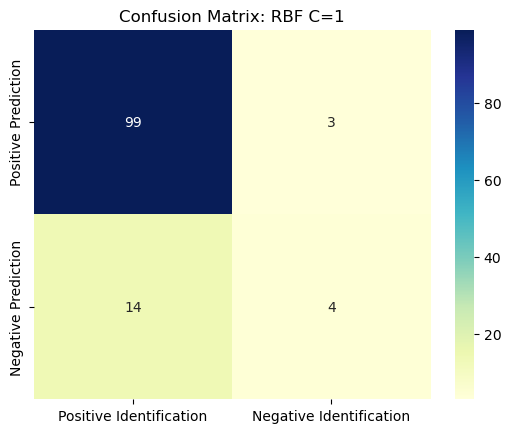

In [67]:
cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: RBF C=1")

Accuracy: 0.8500
C = 100


Text(0.5, 1.0, 'Confusion Matrix: RBF C=100')

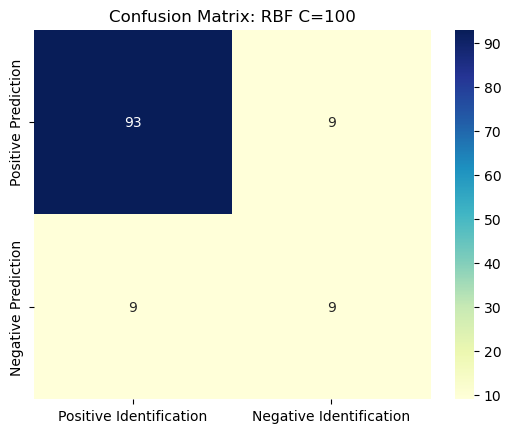

In [71]:
svc=SVC(C=100, kernel='rbf') 

svc.fit(X_train,y_train)

predictions=svc.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))
print('C = 100')

cm = confusion_matrix(y_test, predictions)

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: RBF C=100")

Accuracy: 0.8083
C = 1000


Text(0.5, 1.0, 'Confusion Matrix: RBF C=1000')

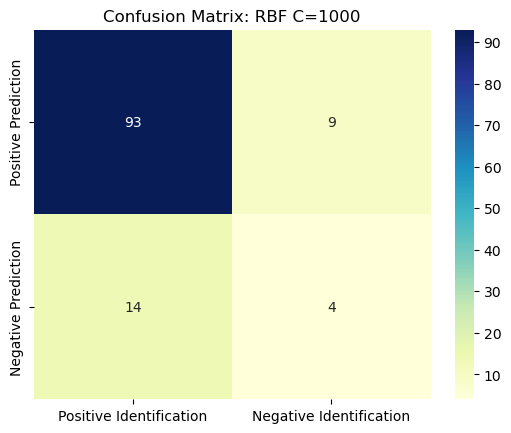

In [70]:
svc=SVC(C=1000, kernel='rbf') 

svc.fit(X_train,y_train)

predictions=svc.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))
print('C = 1000')

cm = confusion_matrix(y_test, predictions)

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: RBF C=1000")

Accuracy: 0.8833


Text(0.5, 1.0, 'Confusion Matrix: Polynomial C=1')

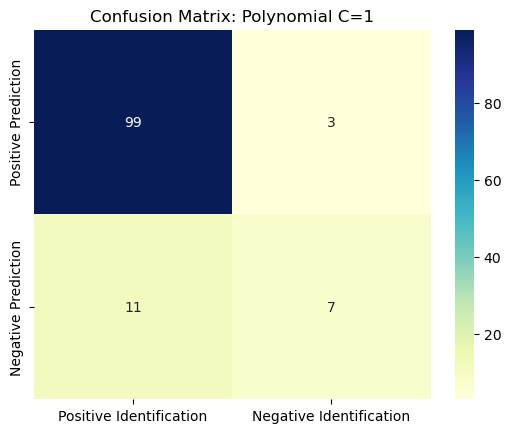

In [79]:
svc2=SVC(kernel='poly', degree=2, coef0=1, C=1) 

svc2.fit(X_train,y_train)

predictions=svc2.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

cm = confusion_matrix(y_test, predictions)

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: Polynomial C=1")

Accuracy: 0.8167


Text(0.5, 1.0, 'Confusion Matrix: Polynomial C=100')

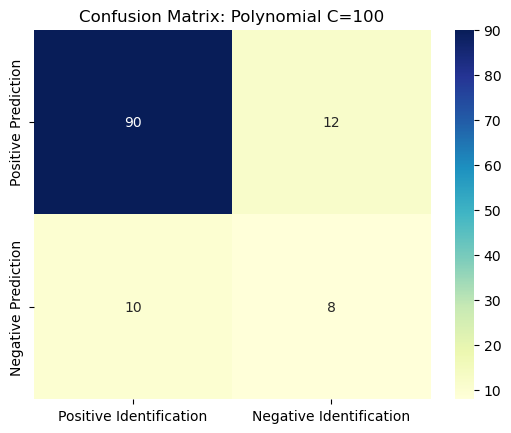

In [80]:
svc2=SVC(kernel='poly', degree=2, coef0=1, C=100) 

svc2.fit(X_train,y_train)

predictions=svc2.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

cm = confusion_matrix(y_test, predictions)

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: Polynomial C=100")

Accuracy: 0.7917


Text(0.5, 1.0, 'Confusion Matrix: Polynomial C=1000')

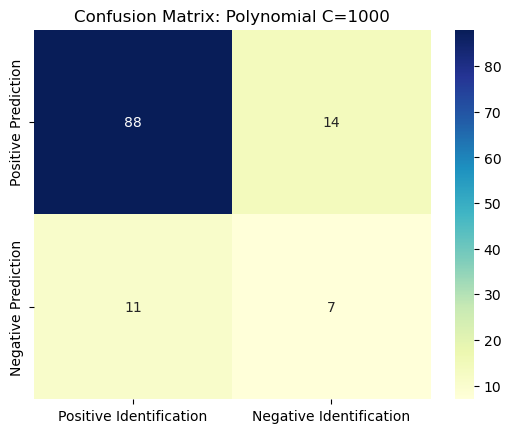

In [81]:
svc2=SVC(kernel='poly', degree=2, coef0=1, C=1000) 

svc2.fit(X_train,y_train)

predictions=svc2.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

cm = confusion_matrix(y_test, predictions)

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: Polynomial C=1000")

Accuracy: 0.8583


Text(0.5, 1.0, 'Confusion Matrix: Sigmoid C=1')

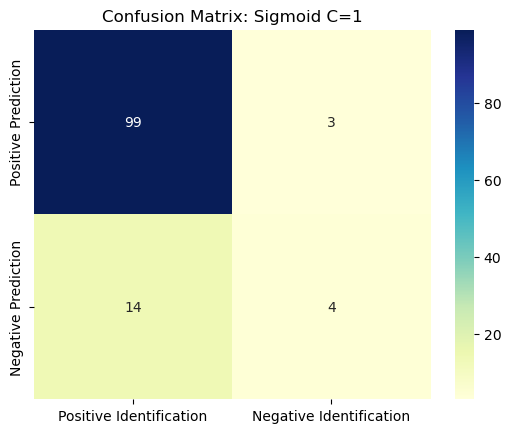

In [82]:
svc3=SVC(kernel='sigmoid', C = 1) 

svc3.fit(X_train,y_train)

predictions=svc3.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

cm = confusion_matrix(y_test, predictions)

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: Sigmoid C=1")

Accuracy: 0.8333


Text(0.5, 1.0, 'Confusion Matrix: Sigmoid C=100')

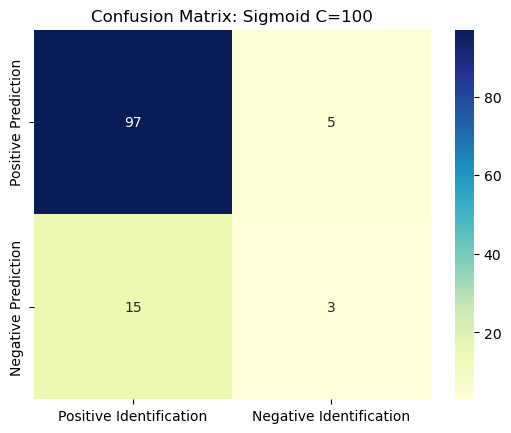

In [83]:
svc3=SVC(kernel='sigmoid', C = 100) 

svc3.fit(X_train,y_train)

predictions=svc3.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

cm = confusion_matrix(y_test, predictions)

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: Sigmoid C=100")

Accuracy: 0.8250


Text(0.5, 1.0, 'Confusion Matrix: Sigmoid C=1000')

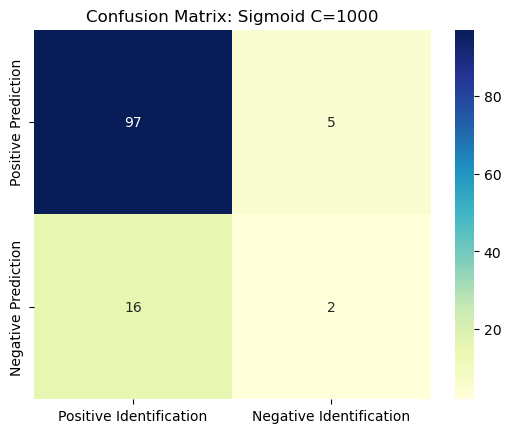

In [84]:
svc3=SVC(kernel='sigmoid', C = 1000) 

svc3.fit(X_train,y_train)

predictions=svc3.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

cm = confusion_matrix(y_test, predictions)

cm_matrix = pd.DataFrame(data=cm, columns=['Positive Identification', 'Negative Identification'], 
                                 index=['Positive Prediction', 'Negative Prediction'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title("Confusion Matrix: Sigmoid C=1000")